In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt

In [2]:
infile_r = "../data_r_con_error.txt"
infile_i = "../data_i_con_error.txt"

infile_r_fit = "../data_r_con_error_fit.txt"
infile_i_fit = "../data_i_con_error_fit.txt"

infile_g_hold = "../data_g_hold_con_error.txt"
infile_r_hold = "../data_r_hold_con_error.txt"
infile_i_hold = "../data_i_hold_con_error.txt"

infile_g_hold_fit = "../data_g_hold_fit_con_error.txt"
infile_r_hold_fit = "../data_r_hold_fit_con_error.txt"
infile_i_hold_fit = "../data_i_hold_fit_con_error.txt"

In [3]:
df_r = np.genfromtxt(infile_r, comments='#')[:,0:]
df_i = np.genfromtxt(infile_i, comments='#')[:,0:]

df_r_fit = np.genfromtxt(infile_r_fit, comments='#')[:,0:]
df_i_fit = np.genfromtxt(infile_i_fit, comments='#')[:,0:]

df_g_hold = np.genfromtxt(infile_g_hold, comments='#')[:,0:]
df_r_hold = np.genfromtxt(infile_r_hold, comments='#')[:,0:]
df_i_hold = np.genfromtxt(infile_i_hold, comments='#')[:,0:]

df_g_hold_fit = np.genfromtxt(infile_g_hold_fit, comments='#')[:,0:]
df_r_hold_fit = np.genfromtxt(infile_r_hold_fit, comments='#')[:,0:]
df_i_hold_fit = np.genfromtxt(infile_i_hold_fit, comments='#')[:,0:]

In [4]:
nombres =["df_r","df_i","df_r_fit","df_i_fit","df_g_hold","df_r_hold","df_i_hold","df_g_hold_fit","df_r_hold_fit","df_i_hold_fit"]
radius = [[],[],[],[],[],[],[],[],[],[]]
mu = [[],[],[],[],[],[],[],[],[],[]]
error_mu = [[],[],[],[],[],[],[],[],[],[]]

In [5]:
radius = df_r[:, 0]
mu = df_r[:, 1]
error_mu = df_r[:, 2]

radius_hold = df_r_hold[:, 0]
mu_hold = df_r_hold[:, 1]
error_mu_hold = df_r_hold[:, 2]

x = np.arange(0., 10, 0.01)

Pendiente = 0.43412741437595764 +/- 0.004999844146937308
Ordenada en origen =  20.266561006732655 +/- 0.023028183639777006
r_h =2.372575345145129$\pm$ 0.00013662045747600473

Pendiente_hold = 0.4276457589011403 +/- 0.00313580604944096
Ordenada en origen =  20.40126048664888 +/- 0.017167854483501502
r_h =2.408535519320109$\pm$5.538182630407643e-05


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


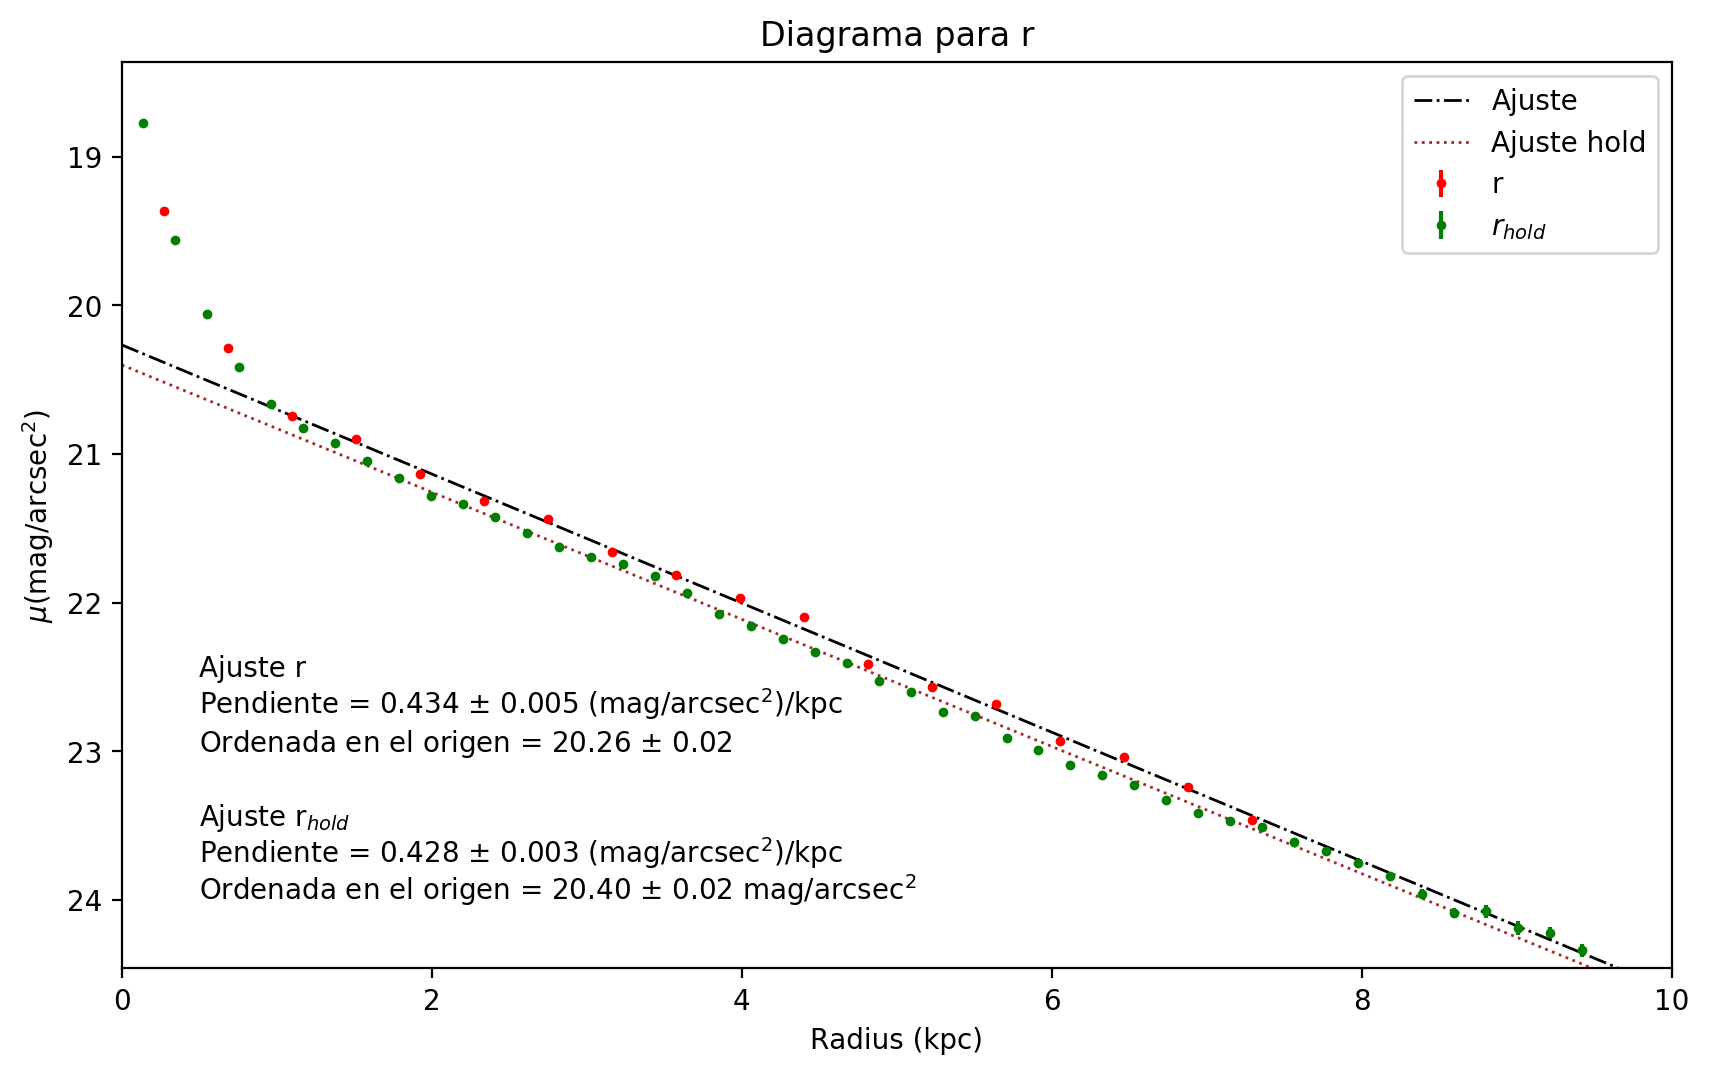

In [6]:
fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)

ax.set_title('Diagrama para r')
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('$\mu$(mag/arcsec$^2$)')

plt.ylim(max(mu)+1, min(mu)-1) 
plt.xlim(0,10) 

ax.errorbar(radius, mu, yerr=error_mu, fmt='.',  markersize='5',color='r',label="r")
ax.errorbar(radius_hold, mu_hold, yerr=error_mu_hold, fmt='.',  markersize='5',color='g',label="$r_{hold}$")

rmin = 1
rmax = 9

#COMENTDO AJUSTE SIN ERROR, JUSTO DEBAJO AJUSTE CON ERROR
#m, b = np.polyfit(radius[(radius > rmin) & (radius < rmax)],mu[(radius > rmin) & (radius < rmax)],1)
#print("Ordenada en origen", b)
#print("Pendiente=", m)

p, V = np.polyfit(radius[(radius > rmin) & (radius < rmax)],mu[(radius > rmin) & (radius < rmax)], 1, cov=True)
print ("Pendiente = {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print ("Ordenada en origen =  {} +/- {}".format(p[1], np.sqrt(V[1][1])))
m = p[0]
b = p[1]
e_m = V[0][0]
e_b = V[1][1]
r_h = 1.03/m
e_r_h = 1.03*e_m/(m**2)
print("r_h ={}$\pm$ {}".format(r_h, e_r_h))
print()
#COMENTDO AJUSTE SIN ERROR, JUSTO DEBAJO AJUSTE CON ERROR HOLD
#m_hold, b_hold = np.polyfit(radius_hold[(radius_hold > rmin) & (radius_hold < rmax)],mu_hold[(radius_hold > rmin) & (radius_hold < rmax)],1)
#print("Ordenada en origen", b_hold)
#print("Pendiente=", m_hold)
p, V = np.polyfit(radius_hold[(radius_hold > rmin) & (radius_hold < rmax)],mu_hold[(radius_hold > rmin) & (radius_hold < rmax)],1, cov=True)
print ("Pendiente_hold = {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print ("Ordenada en origen =  {} +/- {}".format(p[1], np.sqrt(V[1][1])))

m_hold = p[0]
b_hold = p[1]
e_m_hold = V[0][0]
e_b_hold = V[1][1]
r_h_hold = 1.03/m_hold
e_r_h_hold = 1.03*e_m_hold/(m_hold**2)
print("r_h ={}$\pm${}".format(r_h_hold, e_r_h_hold))

ax.plot(x, m*x + b, color = "black", linewidth=1.0, linestyle="-.",label="Ajuste")
ax.plot(x, m_hold*x + b_hold, color = "brown", linewidth=1.0, linestyle=":",label="Ajuste hold")

plt.text(.5, 22.5,'Ajuste r')
plt.text(.5, 22.75,'Pendiente = 0.434 $\pm$ 0.005 (mag/arcsec$^2$)/kpc')
plt.text(.5, 23,'Ordenada en el origen = 20.26 $\pm$ 0.02')

plt.text(.5, 23.5,'Ajuste r$_{hold}$')
plt.text(.5, 23.75,'Pendiente = 0.428 $\pm$ 0.003 (mag/arcsec$^2$)/kpc')
plt.text(.5, 24,'Ordenada en el origen = 20.40 $\pm$ 0.02 mag/arcsec$^2$')

ax.legend(loc='upper right')
plt.savefig("r_py.eps")
plt.show()

In [7]:
radius = df_i[:, 0]
mu = df_i[:, 1]
error_mu = df_i[:, 2]

radius_hold = df_i_hold[:, 0]
mu_hold = df_i_hold[:, 1]
error_mu_hold = df_i_hold[:, 2]

Pendiente = 0.4417578472062766 +/- 0.007881439234303384
Ordenada en origen =  19.92834336819801 +/- 0.03630017750542445
r_h =2.3315941222410177$\pm$ 0.0003278534378123362

Pendiente_hold = 0.4324383286052554 +/- 0.004566577135512566 
Ordenada en origen =  20.058344921708667 +/- 0.025001014257288463
r_h =2.381842523816198 $\pm$ 0.0001148604359202585


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


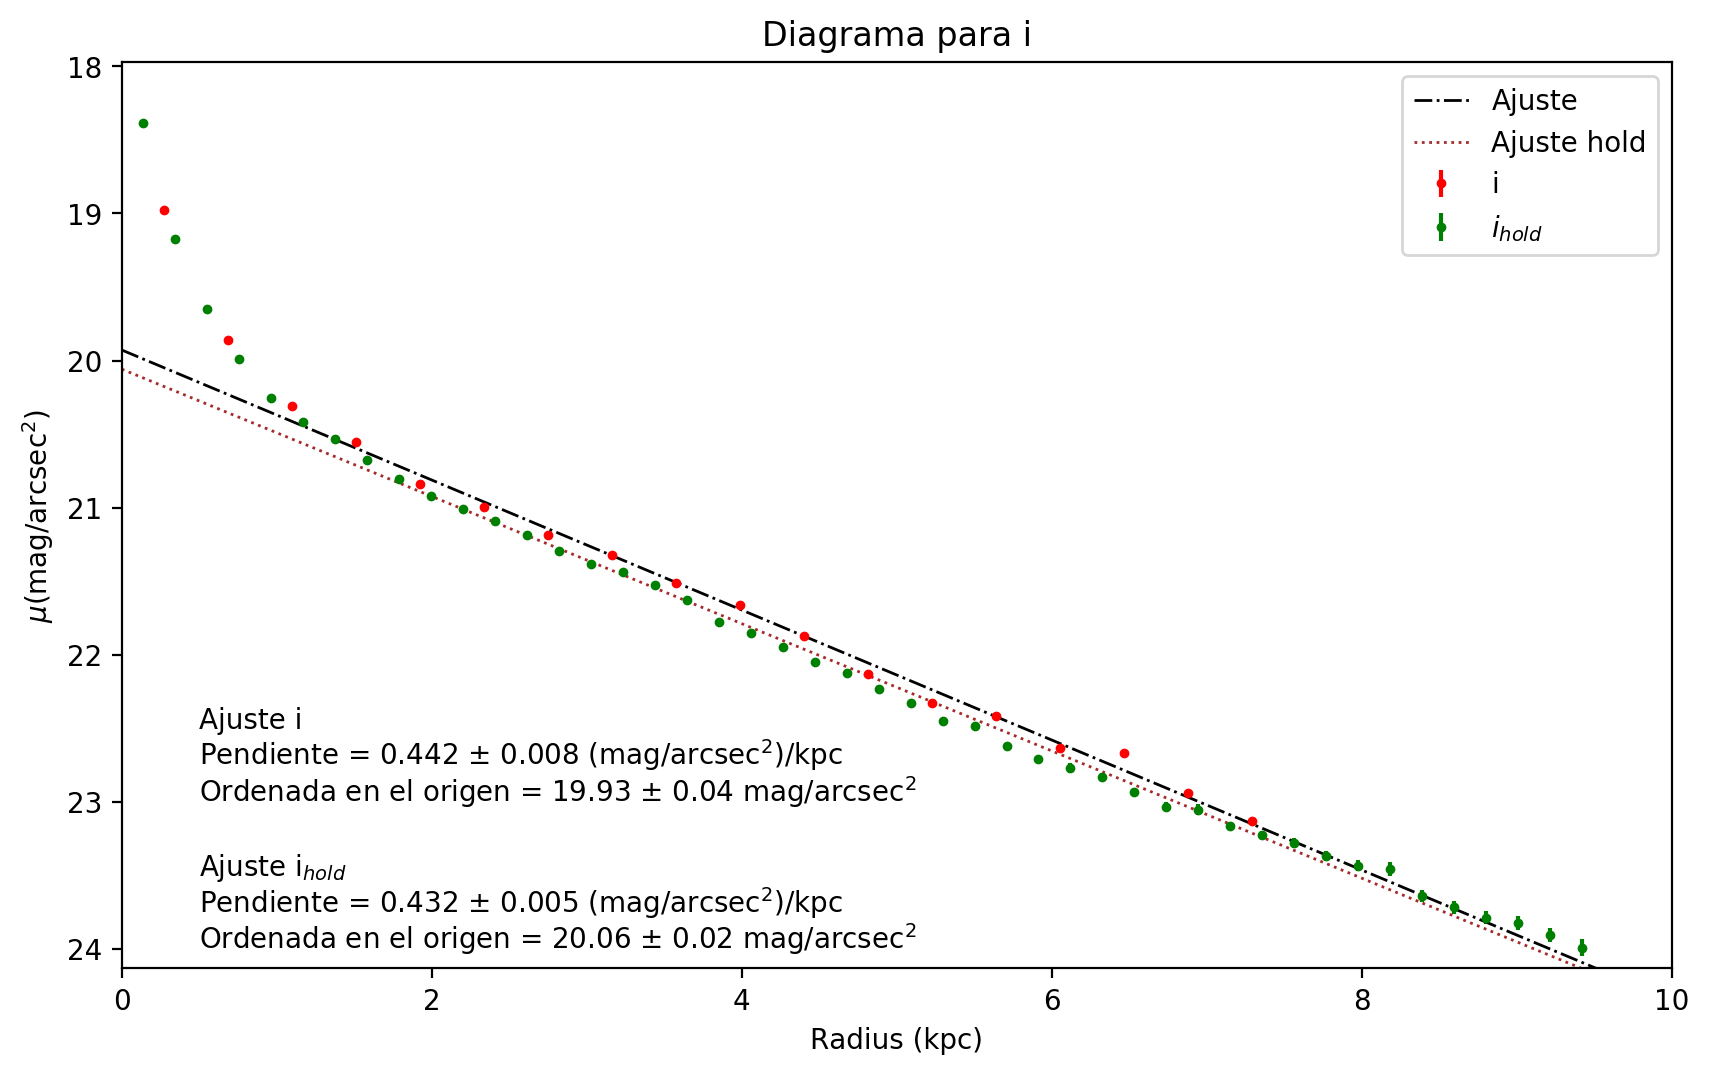

In [8]:
fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)

ax.set_title('Diagrama para i')
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('$\mu$(mag/arcsec$^2$)')

plt.ylim(max(mu)+1, min(mu)-1) 
plt.xlim(0,10) 

ax.errorbar(radius, mu, yerr=error_mu, fmt='.',  markersize='5',color='r',label="i")
ax.errorbar(radius_hold, mu_hold, yerr=error_mu_hold, fmt='.',  markersize='5',color='g',label="$i_{hold}$")

rmin = 1
rmax = 9
#COMENTDO AJUSTE SIN ERROR, JUSTO DEBAJO AJUSTE CON ERROR
#m, b = np.polyfit(radius[(radius > rmin) & (radius < rmax)],mu[(radius > rmin) & (radius < rmax)],1)
#print("Ordenada en origen", b)
#print("Pendiente=", m)

p, V = np.polyfit(radius[(radius > rmin) & (radius < rmax)],mu[(radius > rmin) & (radius < rmax)], 1, cov=True)
print ("Pendiente = {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print ("Ordenada en origen =  {} +/- {}".format(p[1], np.sqrt(V[1][1])))

m = p[0]
b = p[1]
e_m = V[0][0]
e_b = V[1][1]
r_h = 1.03/m
e_r_h = 1.03*e_m/(m**2)
print("r_h ={}$\pm$ {}".format(r_h, e_r_h))

print()

#COMENTDO AJUSTE SIN ERROR, JUSTO DEBAJO AJUSTE CON ERROR HOLD
#m_hold, b_hold = np.polyfit(radius_hold[(radius_hold > rmin) & (radius_hold < rmax)],mu_hold[(radius_hold > rmin) & (radius_hold < rmax)],1)
#print("Ordenada en origen", b_hold)
#print("Pendiente=", m_hold)
p, V = np.polyfit(radius_hold[(radius_hold > rmin) & (radius_hold < rmax)],mu_hold[(radius_hold > rmin) & (radius_hold < rmax)],1, cov=True)
print ("Pendiente_hold = {} +/- {} ".format(p[0], np.sqrt(V[0][0])))
print ("Ordenada en origen =  {} +/- {}".format(p[1], np.sqrt(V[1][1])))

m_hold = p[0]
b_hold = p[1]
e_m_hold = V[0][0]
e_b_hold = V[1][1]
r_h_hold = 1.03/m_hold
e_r_h_hold = 1.03*e_m_hold/(m_hold**2)
print("r_h ={} $\pm$ {}".format(r_h_hold, e_r_h_hold))

ax.plot(x, m*x + b, color = "black", linewidth=1.0, linestyle="-.",label="Ajuste")
ax.plot(x, m_hold*x + b_hold, color = "brown", linewidth=1.0, linestyle=":",label="Ajuste hold")

plt.text(.5, 22.5,'Ajuste i')
plt.text(.5, 22.75,'Pendiente = 0.442 $\pm$ 0.008 (mag/arcsec$^2$)/kpc')
plt.text(.5, 23,'Ordenada en el origen = 19.93 $\pm$ 0.04 mag/arcsec$^2$')

plt.text(.5, 23.5,'Ajuste i$_{hold}$')
plt.text(.5, 23.75,'Pendiente = 0.432 $\pm$ 0.005 (mag/arcsec$^2$)/kpc')
plt.text(.5, 24,'Ordenada en el origen = 20.06 $\pm$ 0.02 mag/arcsec$^2$')

ax.legend(loc='upper right')
plt.savefig("i_py.eps")
plt.show()

In [9]:
radius = df_g_hold[:, 0]
mu = df_g_hold[:, 1]
error_mu = df_g_hold[:, 2]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Pendiente = 0.39146101656909893 +/- 0.0028823687380728005
Ordenada en origen =  21.089472396016863 +/- 0.015780340455638045
r_h =2.6311687662472236 $\pm$ 5.584178127239801e-05



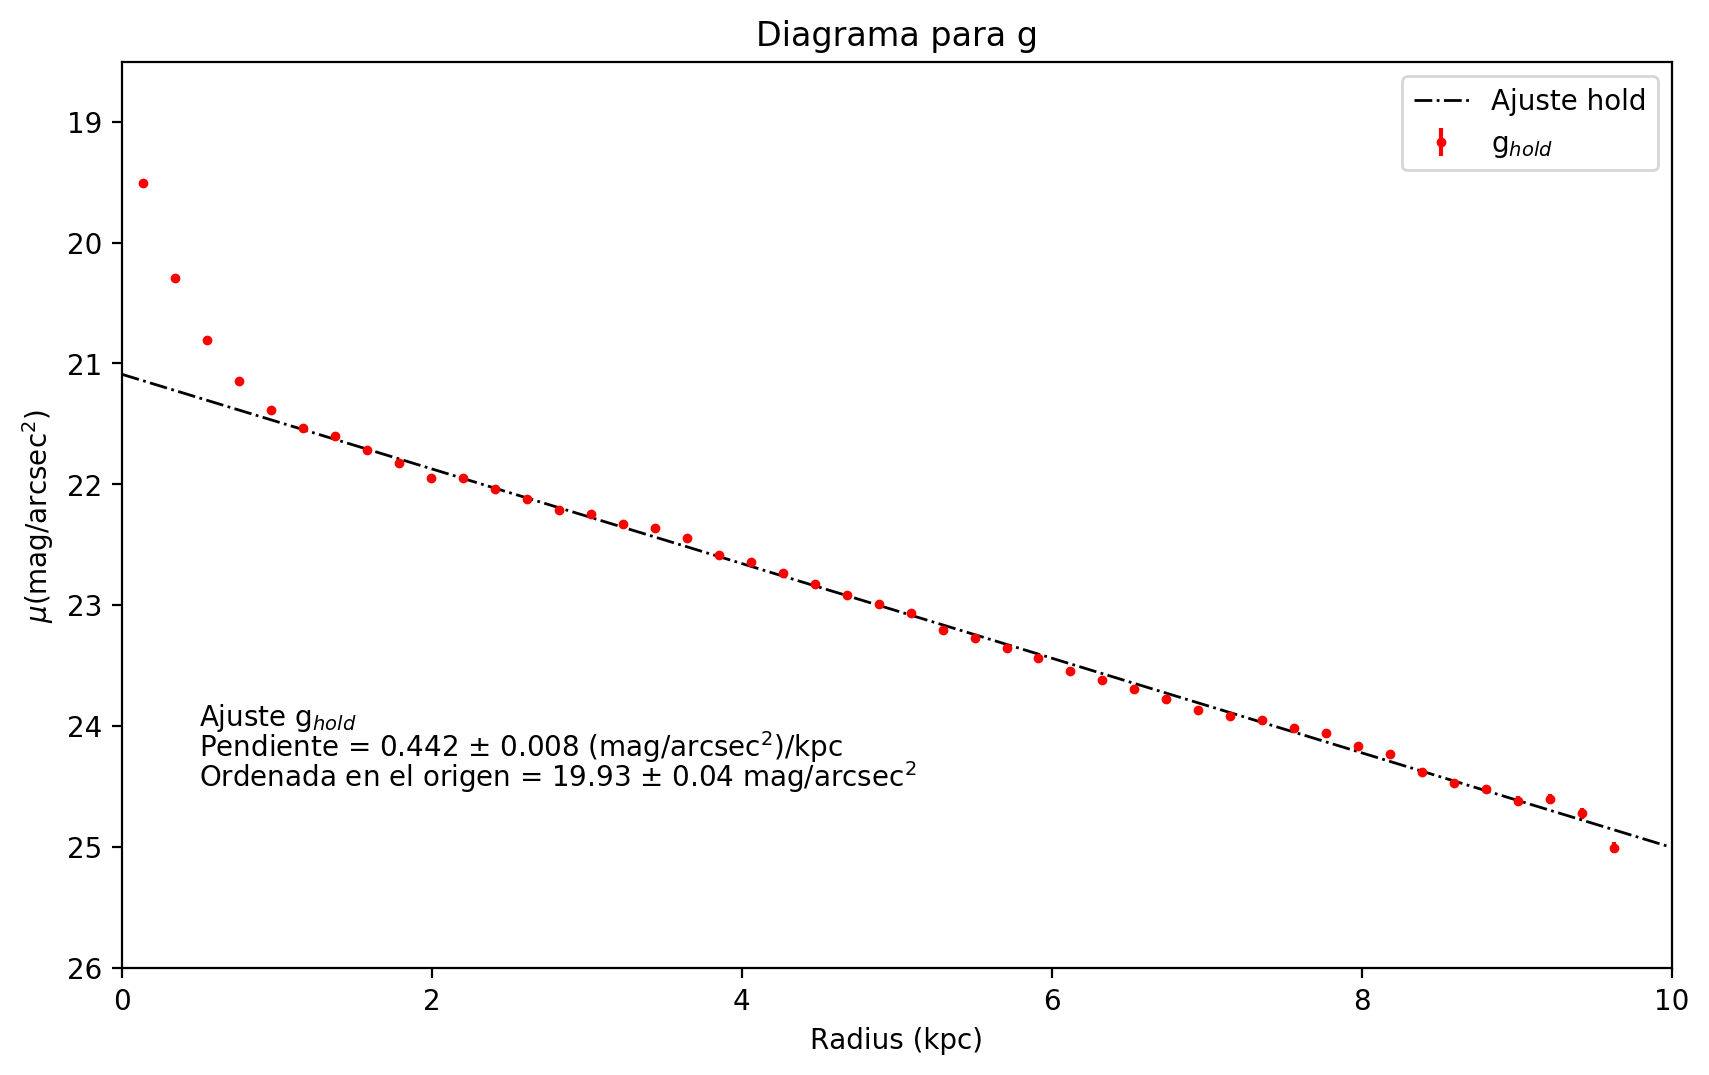

In [10]:
fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)

ax.set_title('Diagrama para g')
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('$\mu$(mag/arcsec$^2$)')

plt.ylim(max(mu) + 1, min(mu)-1) 
plt.xlim(0,10) 

ax.errorbar(radius, mu, yerr=error_mu, fmt='.',  markersize='5',color='r',label="g$_{hold}$")

rmin = 1
rmax = 9
#COMENTDO AJUSTE SIN ERROR, JUSTO DEBAJO AJUSTE CON ERROR
#m, b = np.polyfit(radius[(radius > rmin) & (radius < rmax)],mu[(radius > rmin) & (radius < rmax)],1)
#print("Ordenada en origen", b)
#print("Pendiente=", m)

p, V = np.polyfit(radius[(radius > rmin) & (radius < rmax)],mu[(radius > rmin) & (radius < rmax)], 1, cov=True)
print ("Pendiente = {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print ("Ordenada en origen =  {} +/- {}".format(p[1], np.sqrt(V[1][1])))
m_hold = p[0]
b_hold = p[1]
e_m_hold = V[0][0]
e_b_hold = V[1][1]
r_h_hold = 1.03/m_hold
e_r_h_hold = 1.03*e_m_hold/(m_hold**2)
print("r_h ={} $\pm$ {}".format(r_h_hold, e_r_h_hold))
print()

ax.plot(x, m_hold*x + b_hold, color = "black", linewidth=1.0, linestyle="-.",label="Ajuste hold")
plt.text(.5, 24,'Ajuste g$_{hold}$')
plt.text(.5, 24.25,'Pendiente = 0.442 $\pm$ 0.008 (mag/arcsec$^2$)/kpc')
plt.text(.5, 24.5,'Ordenada en el origen = 19.93 $\pm$ 0.04 mag/arcsec$^2$')

ax.legend(loc='upper right')
plt.savefig("g_py.eps")
plt.show()

In [11]:
radius = df_r[:, 0]
radius_h = df_r_hold[:, 0]

r = df_r[:, 1]
i = df_i[:, 1]

error_r = df_r[:, 2]
error_i = df_i[:, 2]

r_hold = df_r_hold[:, 1]
i_hold = df_i_hold[:, 1]
g_hold = df_g_hold[:, 1]

error_r_h = df_r_hold[:, 2]
error_i_h = df_i_hold[:, 2]
error_g_h = df_g_hold[:, 2]

radius_h 

array([0.13753194, 0.34382986, 0.55012777, 0.75642569, 0.9627236 ,
       1.16902151, 1.37531943, 1.58161734, 1.78791526, 1.99421317,
       2.20051109, 2.406809  , 2.61310691, 2.81940483, 3.02570274,
       3.23200066, 3.43829857, 3.64459649, 3.8508944 , 4.05719232,
       4.26349023, 4.46978814, 4.67608606, 4.88238397, 5.08868189,
       5.2949798 , 5.50127772, 5.70757563, 5.91387354, 6.12017146,
       6.32646937, 6.53276729, 6.7390652 , 6.94536312, 7.15166103,
       7.35795894, 7.56425686, 7.77055477, 7.97685269, 8.1831506 ,
       8.38944852, 8.59574643, 8.80204435, 9.00834226, 9.21464017,
       9.42093809, 9.627236  ])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


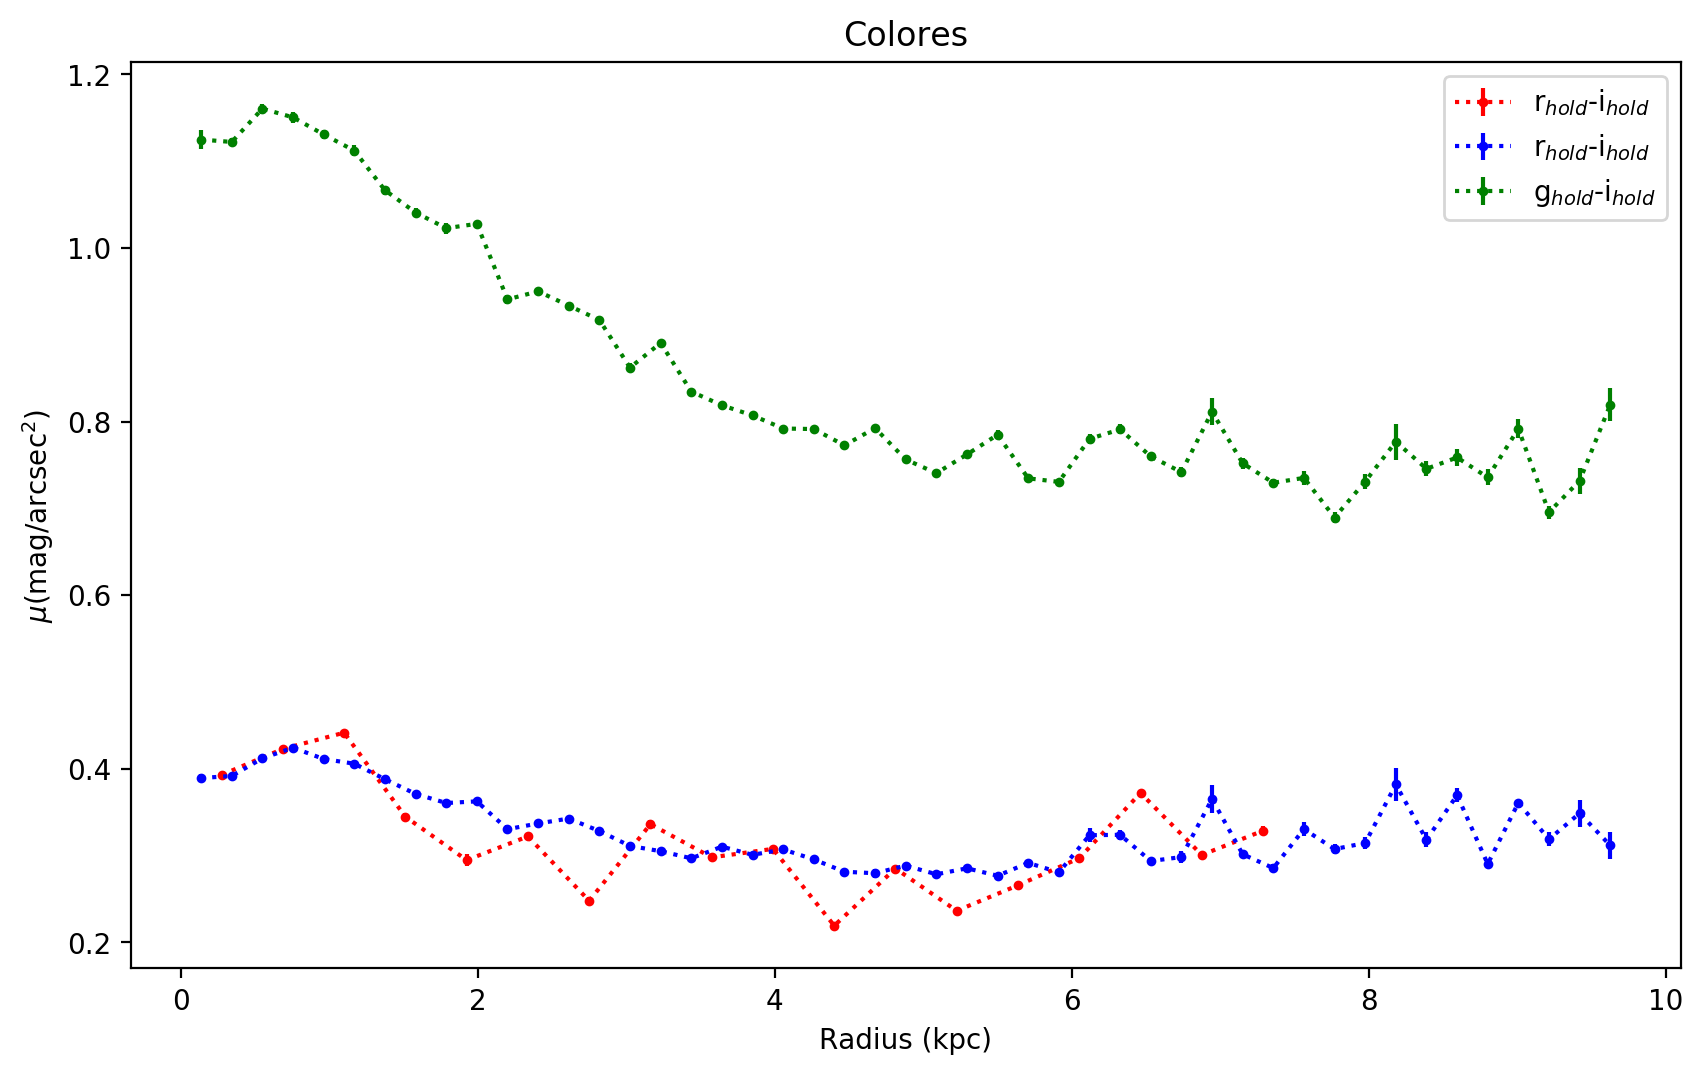

In [12]:
fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)

ax.set_title('Colores')
ax.set_xlabel('Radius (kpc)')
ax.set_ylabel('$\mu$(mag/arcsec$^2$)')

#plt.ylim(max(mu)+1, min(mu)-1) 
#plt.xlim(0,10) 

ax.errorbar(radius, r - i, yerr=error_r - error_i, fmt=':.',  markersize='5',color='r',label="r$_{hold}$-i$_{hold}$")
ax.errorbar(radius_h, r_hold - i_hold, yerr=error_r_h - error_i_h, fmt=':.',  markersize='5',color='b',label="r$_{hold}$-i$_{hold}$")
ax.errorbar(radius_h, g_hold - i_hold, yerr=error_g_h - error_i_h, fmt=':.',  markersize='5',color='g',label="g$_{hold}$-i$_{hold}$")

ax.legend(loc='upper right')
plt.savefig("colores.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


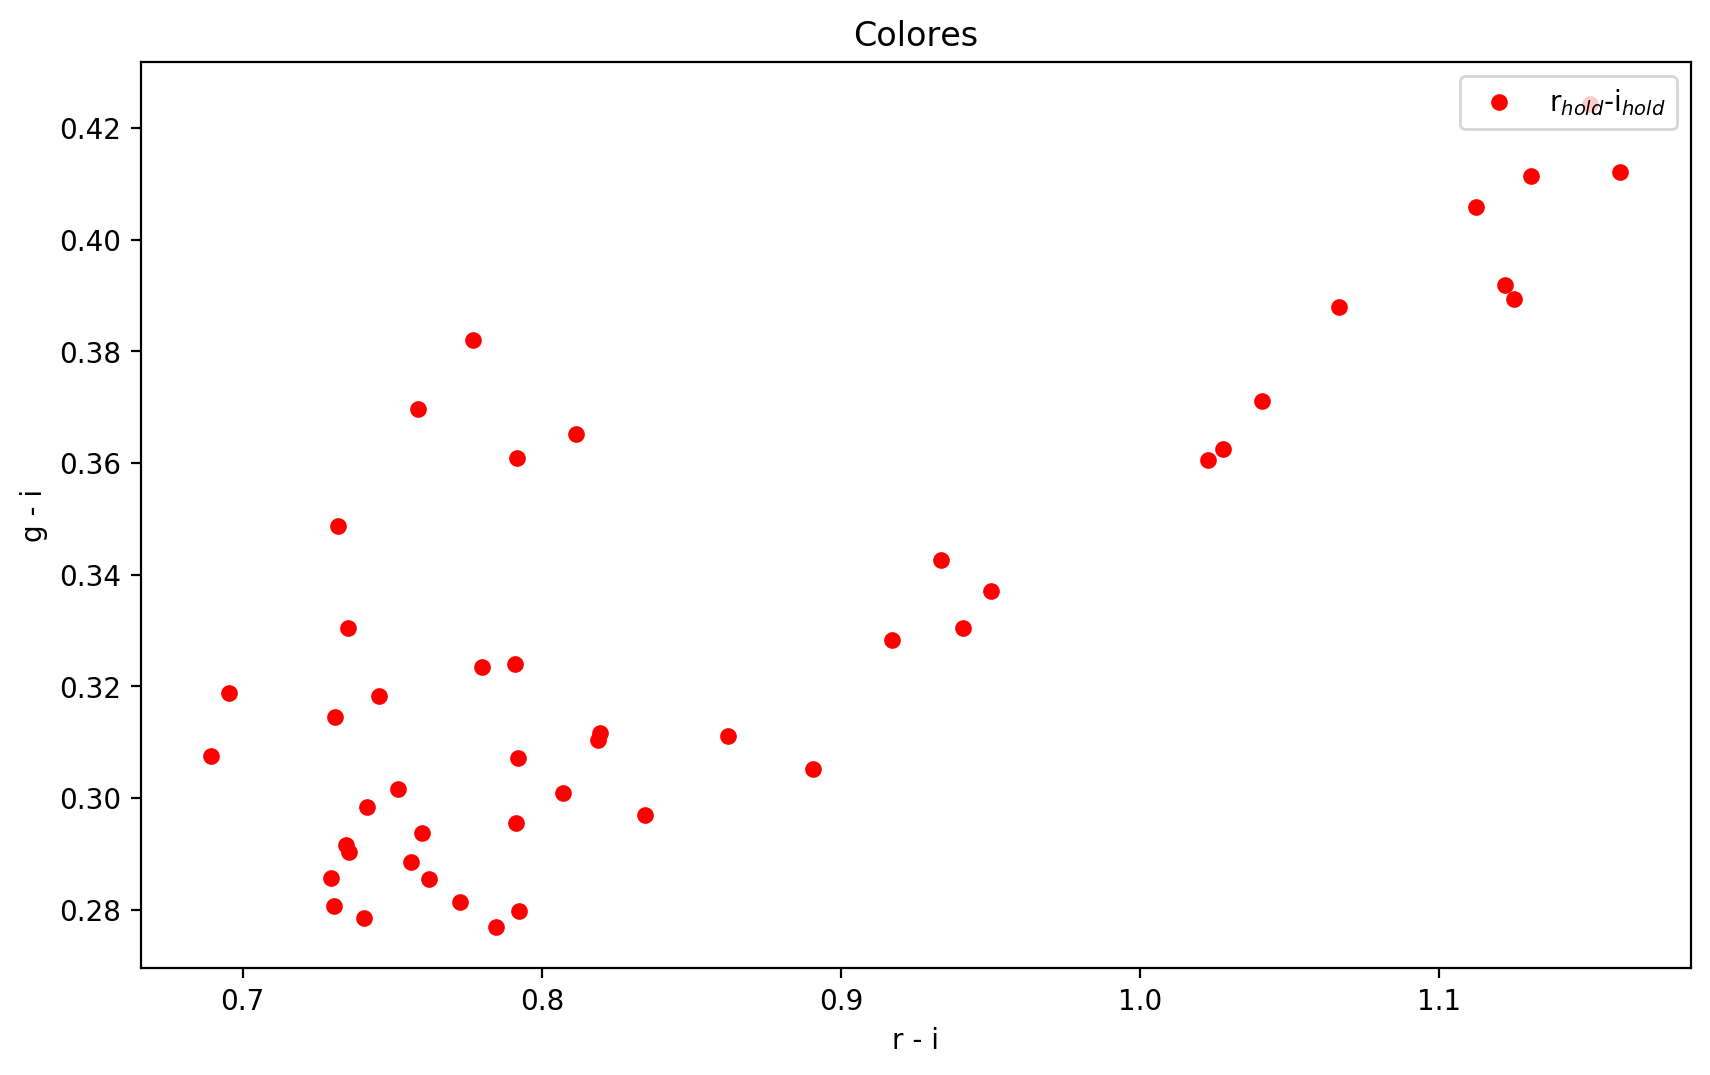

In [13]:
fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)

ax.set_title('Colores')
ax.set_xlabel('r - i')
ax.set_ylabel('g - i')

#plt.ylim(max(mu)+1, min(mu)-1) 
#plt.xlim(0,10) 

ax.plot( g_hold - i_hold, r_hold - i_hold, 'o',  markersize='5',color='r',label="r$_{hold}$-i$_{hold}$")

ax.legend(loc='upper right')
plt.savefig("resta_colores.eps")
plt.show()